In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 3 + 2*(x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

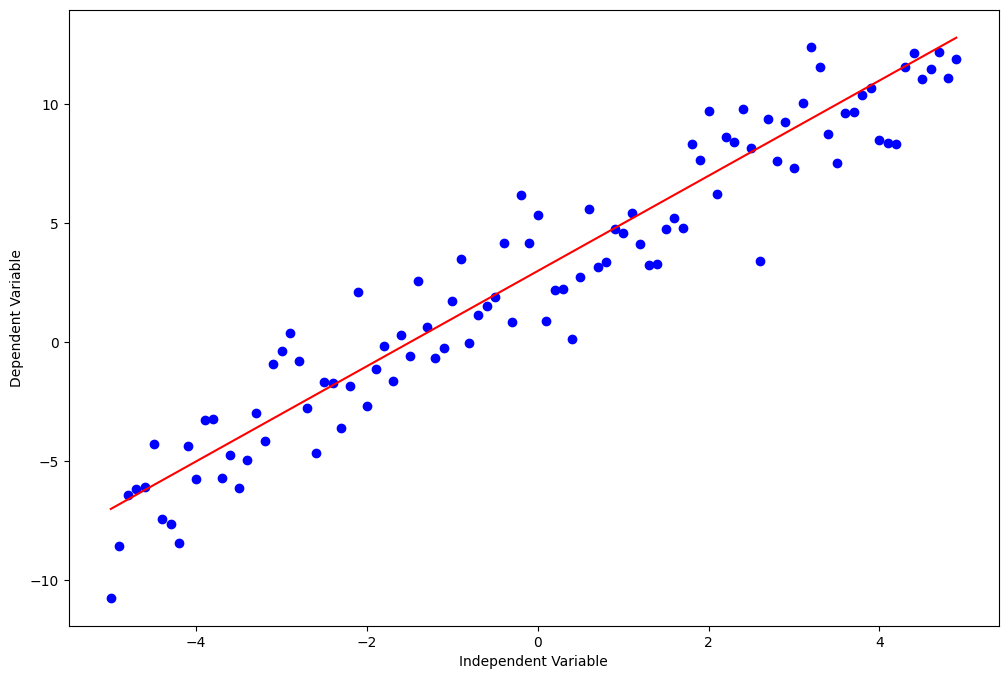

In [5]:
plt.figure(figsize=(12,8))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

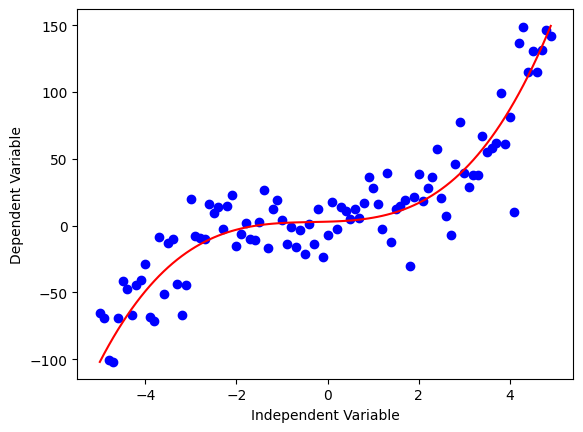

In [7]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Quadratic
y = x^2

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

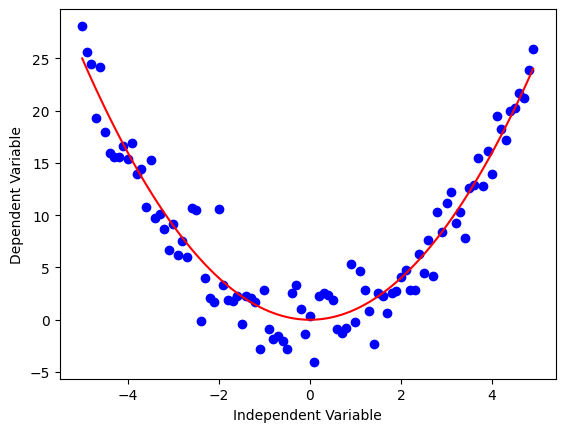

In [9]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Exponential
Y = a + b c^x

In [10]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

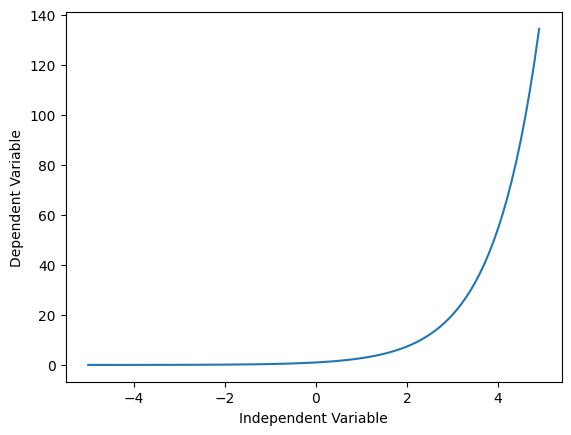

In [11]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logarithmic
y = log(x)

Instead of x, we can use X, which can be a polynomial representation of x values.
y = log(X)

In [12]:
X = np.arange(1.0, 100.0, 0.1)

Y = np.log(X)

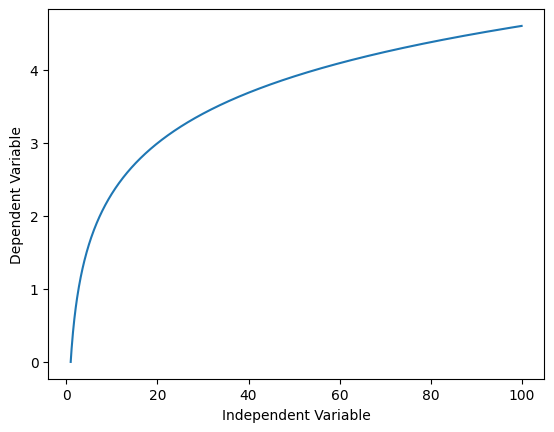

In [13]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logistic / Sigmoid
Y = a + (b / 1 + c ^ (X-d))

In [14]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))


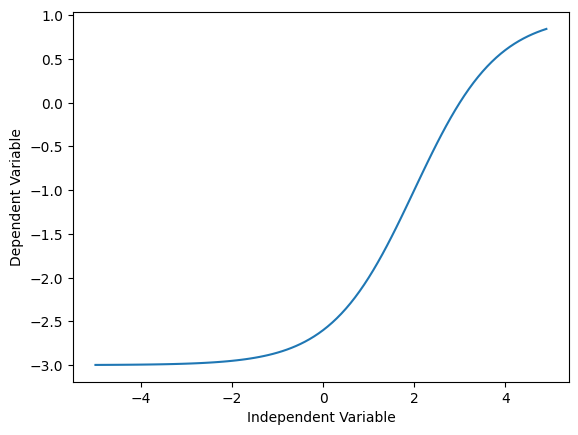

In [15]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regression example

In [16]:
import numpy as np
import pandas as pd

In [17]:
# downloading dataset
# !wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomai

In [18]:
df = pd.read_csv("china_gdp.csv")

In [19]:
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


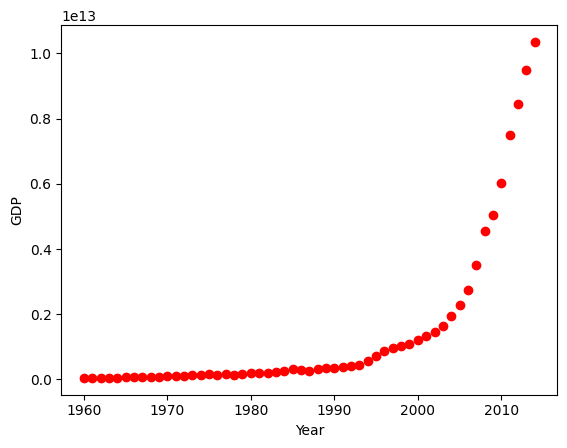

In [20]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

Practice
1- Choose a model for data set. Which one will be best fit?

Exponential
Sigmoid (you can use curve_fit)
2- Calculate what is the accuracy of your model.

Veriler düzenli bir artış ve azalış gösterdiği için "Exponential" modeli kurarak yapıyoruz.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("china_gdp.csv")

In [22]:
x_data = df["Year"].values.reshape(-1, 1)
y_data = df["Value"].values.reshape(-1, 1)

Üstel Modeli föormülize ettiğimizde:
Y(t) = Y0 * e^(r*t)
- Y(t) GDP değeri zaman t.
- Y0 başlangıç değeri.
- r büyüme hızı.
- t zaman.

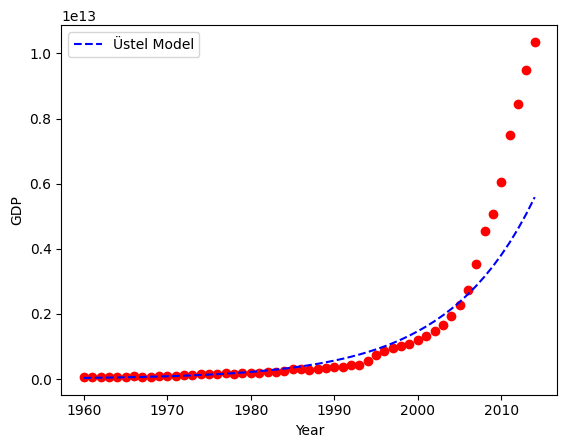

Üstel Model: Y(t) = 1.5890175131419505e-71 * e^(0.09551716761573034 * t)
Mean Squared Error (MSE): 0.09462482699466168
R^2 Score: 0.960470115735818


In [23]:
model = LinearRegression()
model.fit(x_data, np.log(y_data))  #Y değerini logaritmik olarak dönüştür

# Formüldeki r ve Y0 değerlerini tanımlıyoruz.
r = model.coef_[0][0]
Y0 = np.exp(model.intercept_[0])

# Veriyi ve uygun üstel modeli çiz
plt.scatter(df["Year"], df["Value"], color='red')
plt.plot(df["Year"], Y0 * np.exp(r * x_data), label='Üstel Model', linestyle='--', color='blue')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.show()

y_pred = Y0 * np.exp(r * x_data)
mse = mean_squared_error(np.log(y_data), np.log(y_pred))
r2 = r2_score(np.log(y_data), np.log(y_pred))
# Modelin parametrelerini ve değerlendirme metriklerini yazdır
print(f"Üstel Model: Y(t) = {Y0} * e^({r} * t)")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Sonuçlara bakıldığında exponential model veri seti için uygun gözüküyor.

In [24]:
## Hoca'nın Çözümü

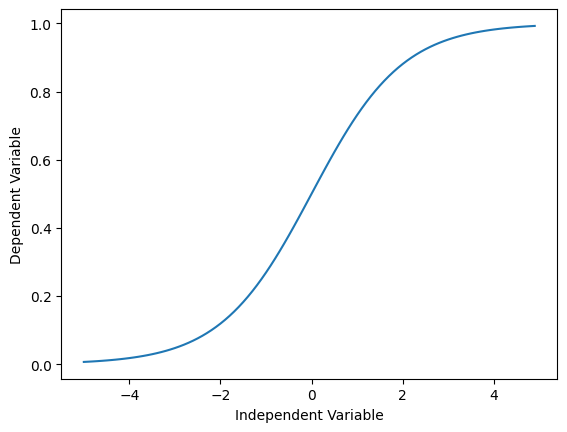

In [25]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [26]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

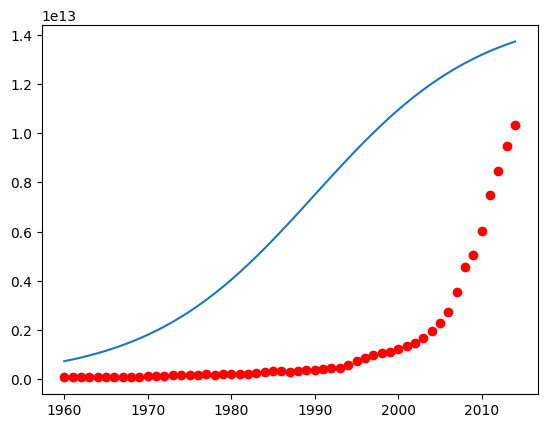

In [27]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [28]:
# Normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [31]:
print(xdata)
print(ydata)

[[0.97318769]
 [0.97368421]
 [0.97418073]
 [0.97467726]
 [0.97517378]
 [0.97567031]
 [0.97616683]
 [0.97666336]
 [0.97715988]
 [0.97765641]
 [0.97815293]
 [0.97864945]
 [0.97914598]
 [0.9796425 ]
 [0.98013903]
 [0.98063555]
 [0.98113208]
 [0.9816286 ]
 [0.98212512]
 [0.98262165]
 [0.98311817]
 [0.9836147 ]
 [0.98411122]
 [0.98460775]
 [0.98510427]
 [0.98560079]
 [0.98609732]
 [0.98659384]
 [0.98709037]
 [0.98758689]
 [0.98808342]
 [0.98857994]
 [0.98907646]
 [0.98957299]
 [0.99006951]
 [0.99056604]
 [0.99106256]
 [0.99155909]
 [0.99205561]
 [0.99255214]
 [0.99304866]
 [0.99354518]
 [0.99404171]
 [0.99453823]
 [0.99503476]
 [0.99553128]
 [0.99602781]
 [0.99652433]
 [0.99702085]
 [0.99751738]
 [0.9980139 ]
 [0.99851043]
 [0.99900695]
 [0.99950348]
 [1.        ]]
[[0.0057156 ]
 [0.00478589]
 [0.00450854]
 [0.00483806]
 [0.00570384]
 [0.00673204]
 [0.00732793]
 [0.00695878]
 [0.0067595 ]
 [0.00760213]
 [0.00883705]
 [0.00951846]
 [0.01083164]
 [0.01320831]
 [0.01373801]
 [0.01556399]
 [0.0

In [33]:
import numpy as np

xdata = np.array(xdata).flatten()
ydata = np.array(ydata).flatten()

In [35]:
popt, pcov = curve_fit(sigmoid, xdata, ydata, p0=(0.5, 0.5))

C:\Users\Asus\AppData\Local\Temp\ipykernel_50488\2019168874.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
c:\DATA\venv\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


C:\Users\Asus\AppData\Local\Temp\ipykernel_50488\2019168874.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))


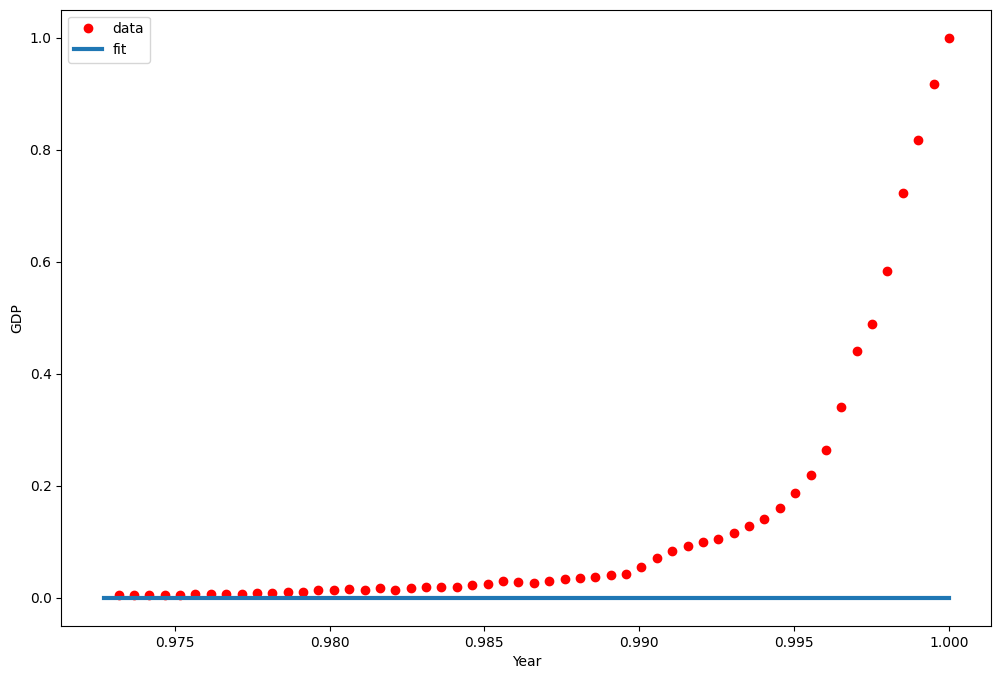

In [36]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(12,8))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [37]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.77
